Exploratory Data Analysis of Google Play Store Apps

Importing Libraries First, we import the necessary libraries for data manipulation and visualization. pandas and numpy are used for data handling, while matplotlib and seaborn are used for plotting graphs. We also suppress warnings to keep the notebook clean.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Loading the Dataset We load the main dataset googleplaystore.csv into a pandas DataFrame and display the first few rows to understand its structure.

In [3]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Data Information Check the dataset information to see column names, non-null counts, and data types. This helps identify which columns need type conversion or cleaning.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Cleaning the Data - Dropping Erroneous Row Upon inspection (standard for this dataset), row index 10472 contains shifted data which causes errors in processing. We drop this row to ensure data integrity.

In [5]:
df.drop(10472, axis=0, inplace=True)

Cleaning and Converting 'Reviews' Column The 'Reviews' column is currently an object (string) type. We convert it to an integer type for numerical analysis.

In [6]:
df['Reviews'] = df['Reviews'].astype('int')

Cleaning and Converting 'Size' Column The 'Size' column contains mixed formats like 'M' (Megabytes), 'k' (kilobytes), and "Varies with device". We define a function to normalize all values into bytes. "Varies with device" is treated as a missing value (NaN).

In [7]:
def convert_size_to_bytes(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size

df['Size'] = df['Size'].apply(convert_size_to_bytes)

Cleaning and Converting 'Installs' Column The 'Installs' column contains symbols like '+' and ',' which need to be removed to convert the data into integers.

In [15]:
df['Installs'] = df['Installs'].astype(str).str.replace('+', '').str.replace(',', '')
df['Installs'] = df['Installs'].astype('int')

Cleaning and Converting 'Price' Column The 'Price' column contains the '$' symbol. We remove it and convert the column to float to perform calculations.

In [16]:
df['Price'] = df['Price'].astype(str).str.replace('$', '')
df['Price'] = df['Price'].astype('float')

Handling Missing Values We verify the number of missing values in each column. This helps decide how to handle them (imputation or removal).

In [17]:
df.isnull().sum().sort_values(ascending=False)

Size              1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
Reviews              0
Category             0
App                  0
Installs             0
Content Rating       0
Price                0
Last Updated         0
Genres               0
dtype: int64

Visualizing Missing Data A heatmap is a great way to visualize the distribution of missing data across the DataFrame.

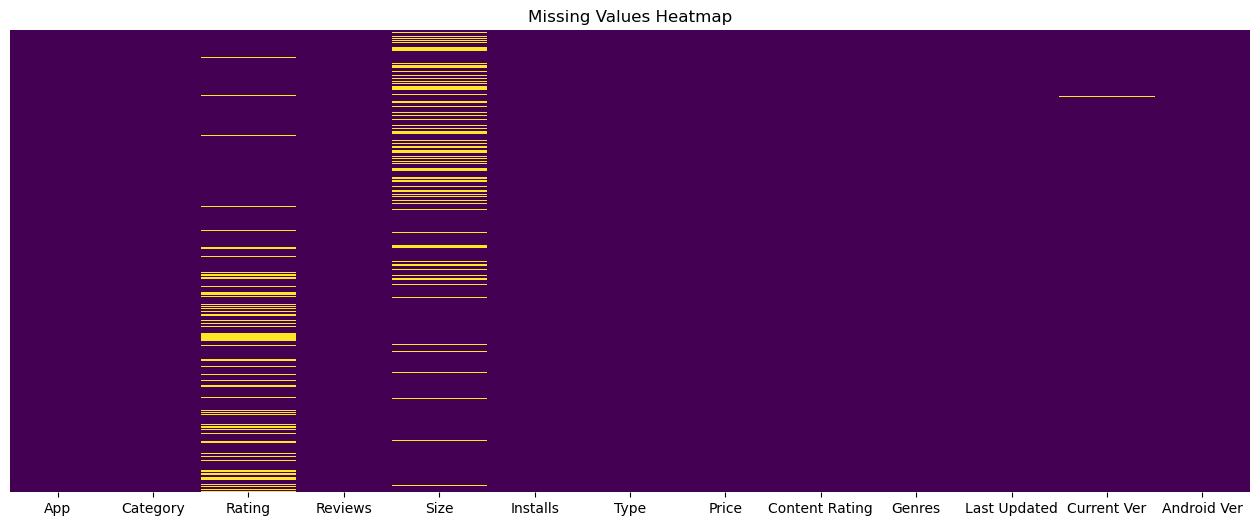

In [18]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Removing Minor Missing Values Columns like 'Current Ver', 'Android Ver', 'Category', 'Type', and 'Genres' have very few missing values. We drop the rows containing these nulls as they won't significantly impact the dataset size.

In [19]:
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace=True)

Imputing 'Rating' Values The 'Rating' column has a significant number of missing values. Instead of filling them with a simple mean, we fill them with the median rating of their respective Categories. This provides a more accurate estimate.

In [20]:
df['Rating'] = df['Rating'].fillna(df.groupby('Category')['Rating'].transform('median'))

Removing Duplicates Duplicate entries can skew the analysis. We check for and remove duplicate rows to ensure each app is counted only once.

In [22]:
df.drop_duplicates(inplace=True)
print(f"Remaining rows: {df.shape[0]}")

Remaining rows: 10346


Analysis - Category with Highest Number of Apps We count the number of apps in each category to see which ones are the most common in the Play Store.

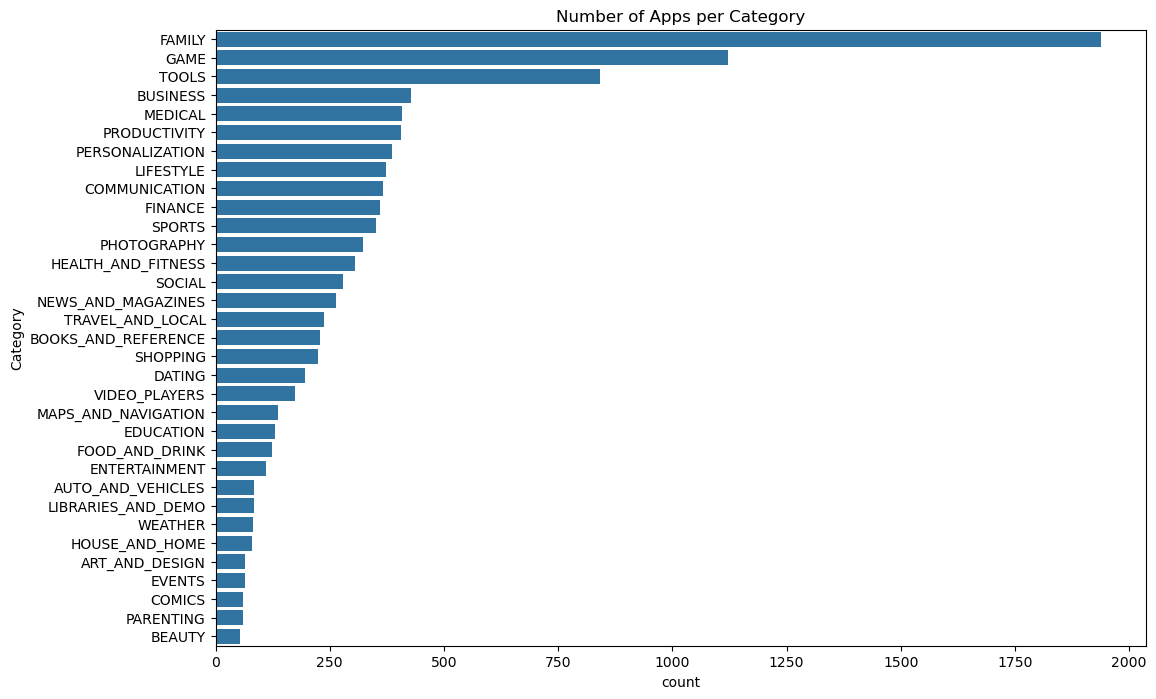

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Number of Apps per Category')
plt.show()

Analysis - Category with Highest Number of Installs We group the data by 'Category' and sum the 'Installs' to identify which categories are most popular among users.

In [24]:
category_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
print(category_installs)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64


Analysis - Category with Highest Number of Reviews Similarly, we check which categories generate the most user interaction by summing the 'Reviews'.

In [25]:
category_reviews = df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)
print(category_reviews)

Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int64


Analysis - Category with Highest Average Rating We calculate the mean rating for each category to see which types of apps are best received by users.


In [27]:
category_ratings = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
print(category_ratings)

Category
EVENTS                 4.454688
BOOKS_AND_REFERENCE    4.382096
ART_AND_DESIGN         4.378125
EDUCATION              4.376154
PERSONALIZATION        4.346632
PARENTING              4.316667
HEALTH_AND_FITNESS     4.295752
GAME                   4.286262
BEAUTY                 4.283019
SOCIAL                 4.260714
Name: Rating, dtype: float64


Rating Distribution Finally, we plot the distribution of ratings to see the general sentiment of users towards apps.

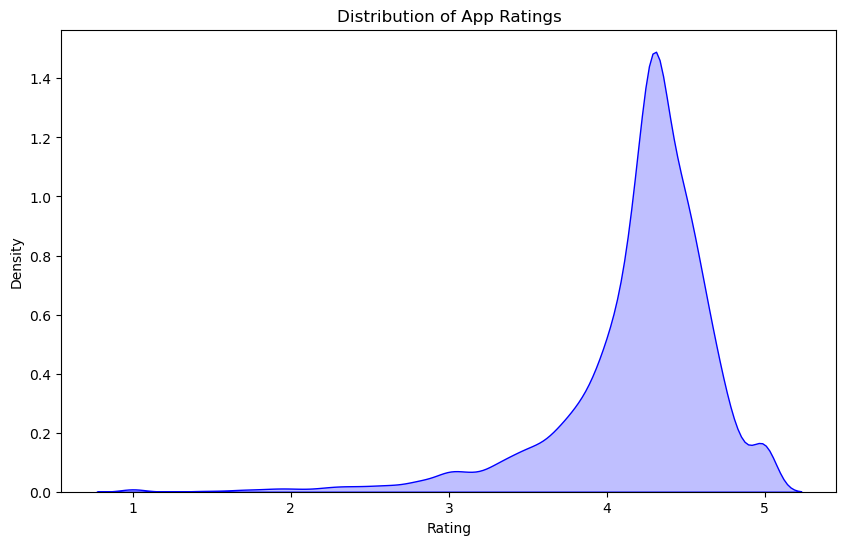

In [28]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['Rating'], color="blue", shade=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()